# Дипломная работа "Анализ данных Олимпийских игр (поиск инсайтов, составление рекомендаций стейкхолдерам, построение модели определения вероятности получения медали спортсменом)"

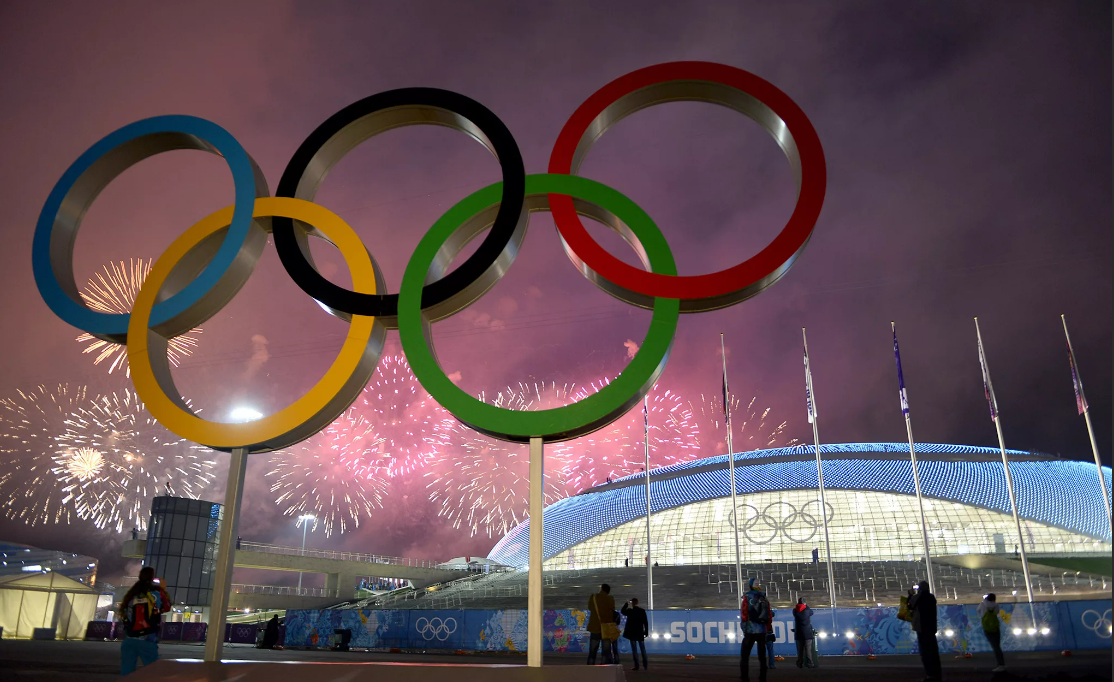

# Обзор и обработка данных

---



### Таблица Olympic_Athlete_Bio

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# датасет с биграфическими данными спортсменов

bio = pd.read_csv('Olympic_Athlete_Bio.csv', na_values = 'na')
bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,16809,Károly Teppert,Male,1891-07-20,NaN,NaN,Hungary,HUN,Károly Teppert started competing in cycling in...,NaN
1,43737,Andrzej Socharski,Male,1947-08-31,173.0,72,Poland,POL,NaN,Listed in Olympians Who Won a Medal at the Wor...
2,50147,Nathalie Wunderlich,Female,1971-06-03,170.0,50,Switzerland,SUI,NaN,NaN
3,5085,Miha Lokar,Male,1935-09-10,182.0,76,Yugoslavia,YUG,NaN,Listed in Olympians Who Won a Medal at the Eur...
4,136329,Austin Hack,Male,1992-05-17,203.0,100,United States,USA,NaN,NaN


In [ ]:
bio['country'].nunique()

697

In [ ]:
# необходимо изменить формат данных для веса и даты рождения

bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155031 entries, 0 to 155030
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155031 non-null  int64  
 1   name           155031 non-null  object 
 2   sex            155031 non-null  object 
 3   born           150747 non-null  object 
 4   height         104484 non-null  float64
 5   weight         104484 non-null  object 
 6   country        155031 non-null  object 
 7   country_noc    155031 non-null  object 
 8   description    51282 non-null   object 
 9   special_notes  60393 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.8+ MB


In [ ]:
# количества нулевых значений по столбцам 

bio.isnull().sum()

athlete_id            0
name                  0
sex                   0
born               4284
height            50547
weight            50547
country               0
country_noc           0
description      103749
special_notes     94638
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


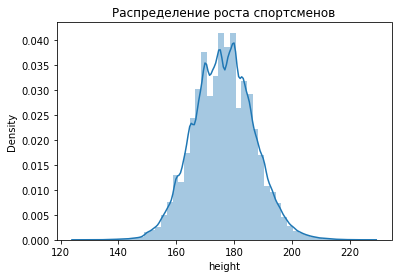

In [ ]:
# распределение роста спортсменов

sns_plot = sns.distplot(bio['height']).set_title('Распределение роста спортсменов')
fig = sns_plot.get_figure()

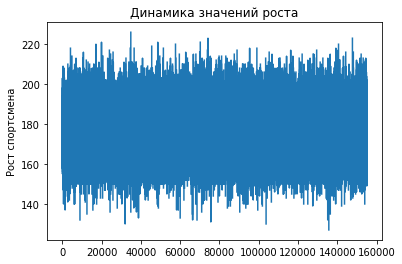

In [ ]:
# есть выбросы

plt.plot(bio['height'])
plt.title('Динамика значений роста')
plt.ylabel('Рост спортсмена')
plt.show()

In [ ]:
# смотрим по весу - есть диапазон 

bio['weight'].value_counts()

70         4777
75         4180
60         3780
68         3614
80         3347
           ... 
83-95         1
110-116       1
69-76         1
105-111       1
63-71         1
Name: weight, Length: 572, dtype: int64

In [ ]:
# для целей исследования достаточно буддет взять только год рождения спортсмена, извлекаем из столбца born и конвертируем в integer

bio['birth_year'] = pd.to_numeric((bio['born'].str[:4]), errors='coerce').astype('Int64')
bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,birth_year
0,16809,Károly Teppert,Male,1891-07-20,NaN,NaN,Hungary,HUN,Károly Teppert started competing in cycling in...,NaN,1891
1,43737,Andrzej Socharski,Male,1947-08-31,173.0,72,Poland,POL,NaN,Listed in Olympians Who Won a Medal at the Wor...,1947
2,50147,Nathalie Wunderlich,Female,1971-06-03,170.0,50,Switzerland,SUI,NaN,NaN,1971
3,5085,Miha Lokar,Male,1935-09-10,182.0,76,Yugoslavia,YUG,NaN,Listed in Olympians Who Won a Medal at the Eur...,1935
4,136329,Austin Hack,Male,1992-05-17,203.0,100,United States,USA,NaN,NaN,1992


In [ ]:
# проверяем результат

bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155031 entries, 0 to 155030
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155031 non-null  int64  
 1   name           155031 non-null  object 
 2   sex            155031 non-null  object 
 3   born           150747 non-null  object 
 4   height         104484 non-null  float64
 5   weight         104484 non-null  object 
 6   country        155031 non-null  object 
 7   country_noc    155031 non-null  object 
 8   description    51282 non-null   object 
 9   special_notes  60393 non-null   object 
 10  birth_year     150548 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(8)
memory usage: 13.2+ MB


In [ ]:
# разделяю вес с диапазоном по "-", и создаю отдельные столбцы, в качестве значения веса буду использовать первую цифру (до "-")

bio = bio.join(bio['weight'].str.split('-', 1, expand=True).rename(columns={0: 'weight_new', 1: 'weight2'}))

In [ ]:
bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,birth_year,weight_new,weight2
0,16809,Károly Teppert,Male,1891-07-20,NaN,NaN,Hungary,HUN,Károly Teppert started competing in cycling in...,NaN,1891,NaN,NaN
1,43737,Andrzej Socharski,Male,1947-08-31,173.0,72,Poland,POL,NaN,Listed in Olympians Who Won a Medal at the Wor...,1947,72,None
2,50147,Nathalie Wunderlich,Female,1971-06-03,170.0,50,Switzerland,SUI,NaN,NaN,1971,50,None
3,5085,Miha Lokar,Male,1935-09-10,182.0,76,Yugoslavia,YUG,NaN,Listed in Olympians Who Won a Medal at the Eur...,1935,76,None
4,136329,Austin Hack,Male,1992-05-17,203.0,100,United States,USA,NaN,NaN,1992,100,None


In [ ]:
# переводим новый столбец в цифру и проверяем результат

bio['weight_new'] = pd.to_numeric(bio['weight_new'], errors='coerce')
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155031 entries, 0 to 155030
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155031 non-null  int64  
 1   name           155031 non-null  object 
 2   sex            155031 non-null  object 
 3   born           150747 non-null  object 
 4   height         104484 non-null  float64
 5   weight         104484 non-null  object 
 6   country        155031 non-null  object 
 7   country_noc    155031 non-null  object 
 8   description    51282 non-null   object 
 9   special_notes  60393 non-null   object 
 10  birth_year     150548 non-null  Int64  
 11  weight_new     104460 non-null  float64
 12  weight2        931 non-null     object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 15.5+ MB


In [ ]:
# переименовываем столбец страны с athlete_country чтобы не было путаници со страной игр в дальнейшем

bio = bio.rename(columns={"country": "athlete_country"})
bio.columns

Index(['athlete_id', 'name', 'sex', 'born', 'height', 'weight',
       'athlete_country', 'country_noc', 'description', 'special_notes',
       'birth_year', 'weight_new', 'weight2'],
      dtype='object')

In [ ]:
# оставляем необходимые для анализа столбцы

bio = bio[['athlete_id', 'name', 'sex', 'height', 'weight_new', 'athlete_country', 'birth_year']]

In [ ]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155031 entries, 0 to 155030
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   athlete_id       155031 non-null  int64  
 1   name             155031 non-null  object 
 2   sex              155031 non-null  object 
 3   height           104484 non-null  float64
 4   weight_new       104460 non-null  float64
 5   athlete_country  155031 non-null  object 
 6   birth_year       150548 non-null  Int64  
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 8.4+ MB


In [ ]:
# смотрим описательную статистику

bio_params = bio[['height', 'weight_new']]
bio_params.describe()

,height,weight_new
count,104484.000000,104460.000000
mean,176.316651,71.899282
std,10.363946,14.472222
min,127.000000,25.000000
25%,169.000000,62.000000
50%,176.000000,70.000000
75%,183.000000,80.000000
max,226.000000,210.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


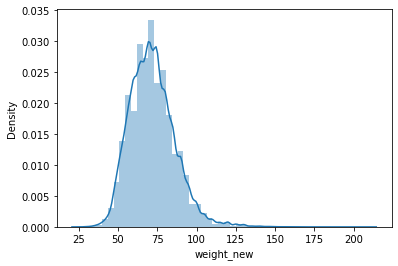

In [ ]:
# распределение веса спортсменов

sns_plot = sns.distplot(bio['weight_new'])
fig = sns_plot.get_figure()

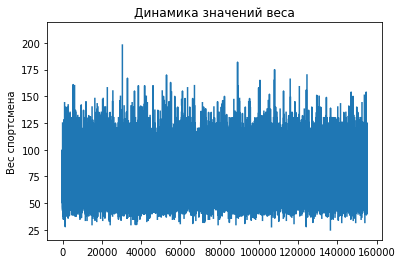

In [ ]:
# есть выбросы

plt.plot(bio['weight_new'])
plt.title('Динамика значений веса')
plt.ylabel('Вес спортсмена')
plt.show()

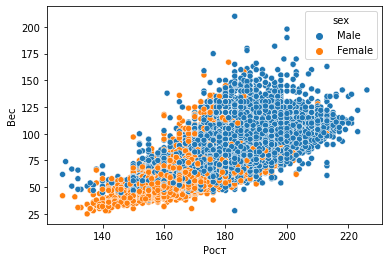

In [ ]:
# распределение веса и роста (м и ж) - также видим выбросы

df2 = bio[(bio.weight_new != 0.0) & (bio.height != 0.0)]
sns.scatterplot(x=df2.height, y=df2.weight_new, hue='sex', data=df2)
plt.xlabel("Рост")
plt.ylabel("Вес");

### Таблица Olympic_Athlete_Event_Results

In [ ]:
# датасет с результатами по играм

results_event = pd.read_csv('Olympic_Athlete_Event_Results.csv', na_values=['na'])
results_event.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [ ]:
# пропуски в медалях - заполнять не нужно

results_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314907 entries, 0 to 314906
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      314907 non-null  object
 1   edition_id   314907 non-null  int64 
 2   country_noc  314907 non-null  object
 3   sport        314907 non-null  object
 4   event        314907 non-null  object
 5   result_id    314907 non-null  int64 
 6   athlete      314907 non-null  object
 7   athlete_id   314907 non-null  int64 
 8   pos          314907 non-null  object
 9   medal        44571 non-null   object
 10  isTeamSport  314907 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.3+ MB


In [ ]:
# добавим столбцец с сезоном

results_event['season'] = (results_event['edition'].str[5:11])
results_event.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,season
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False,Summer
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False,Summer
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False,Summer
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False,Summer
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False,Summer


In [ ]:
# помимио зимних и летних олимпийских игр в датасете есть:
# Внеочередные Олимпийские игры 1906 года, но они не признавались новым составом МОК официальными и не получили порядкового номера - их надо удалить
# Конный спорт Олимпийских игр 1956 год был проведен не в Австралии, а в Швеции - заменяем на Summer

results_event.groupby('season').count().sort_values('athlete', ascending=False).head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
season,,,,,,,,,,,
Summer,252859,252859,252859,252859,252859,252859,252859,252859,252859,37281,252859
Winter,61725,61725,61725,61725,61725,61725,61725,61725,61725,7254,61725
Equest,300,300,300,300,300,300,300,300,300,36,300
Inter,23,23,23,23,23,23,23,23,23,0,23


In [ ]:
# 300 записей заменить

results_event[results_event['season'].isin(['Equest'])]

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,season
2886,1956 Equestrian Olympics,48,CAM,Equestrian Jumping,"Individual, Open",185170,Saing Pen,12677,DNF,NaN,False,Equest
2887,1956 Equestrian Olympics,48,CAM,Equestrian Jumping,"Individual, Open",185170,Isoup Ganthy,12001,DNF,NaN,False,Equest
24988,1956 Equestrian Olympics,48,EGY,Equestrian Jumping,"Individual, Open",185170,Mohamed Selim Zaki,13027,9,NaN,False,Equest
24989,1956 Equestrian Olympics,48,EGY,Equestrian Jumping,"Individual, Open",185170,Gamal Haress,11927,=21,NaN,False,Equest
24990,1956 Equestrian Olympics,48,EGY,Equestrian Jumping,"Individual, Open",185170,Omar El-Hadary,11928,DNF,NaN,False,Equest
...,...,...,...,...,...,...,...,...,...,...,...,...
300280,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Individual, Open",185170,Bill Steinkraus,12787,=15,NaN,False,Equest
300281,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Individual, Open",185170,Frank Chapot,11746,=27,NaN,False,Equest
300282,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Team, Open",185173,Hugh Wiley,13003,5,NaN,True,Equest
300283,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Team, Open",185173,Bill Steinkraus,12787,5,NaN,True,Equest


In [ ]:
# 23 записи удалить

results_event[results_event['season'].isin([' Inter'])]

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,season
3783,1906 Intercalated Games,4,CRT,Athletics,"400 metres, Men",56190,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3784,1906 Intercalated Games,4,CRT,Athletics,"400 metres, Men",56190,Mikhail Giannarakis,79699,DNS,NaN,False,Inter
3785,1906 Intercalated Games,4,CRT,Athletics,"800 metres, Men",56200,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3786,1906 Intercalated Games,4,CRT,Athletics,"800 metres, Men",56200,Mikhail Giannarakis,79699,DNS,NaN,False,Inter
3787,1906 Intercalated Games,4,CRT,Athletics,"1,500 metres, Men",56207,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3788,1906 Intercalated Games,4,CRT,Athletics,"1,500 metres, Men",56207,Mikhail Giannarakis,79699,DNS,NaN,False,Inter
3789,1906 Intercalated Games,4,CRT,Athletics,"5 miles, Men",56212,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3790,1906 Intercalated Games,4,CRT,Athletics,"5 miles, Men",56212,Mikhail Giannarakis,79699,DNS,NaN,False,Inter
3791,1906 Intercalated Games,4,CRT,Athletics,"Marathon, Men",56213,V. Boulakakis,79638,DNF,NaN,False,Inter
3792,1906 Intercalated Games,4,CRT,Athletics,"Marathon, Men",56213,Khristos Ferarolakis,79647,DNF,NaN,False,Inter


In [ ]:
# удаление Внеочередных Олимпийских игр 1906 года

results_event = results_event.drop(results_event[results_event.season == ' Inter'].index)
results_event.groupby('season').count().sort_values('athlete', ascending=False).head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
season,,,,,,,,,,,
Summer,252859,252859,252859,252859,252859,252859,252859,252859,252859,37281,252859
Winter,61725,61725,61725,61725,61725,61725,61725,61725,61725,7254,61725
Equest,300,300,300,300,300,300,300,300,300,36,300


In [ ]:
# замена Конный спорт Олимпийских игр 1956 на Summer 

results_event.season = results_event.season.str.replace('Equest','Summer')
results_event.groupby('season').count().sort_values('athlete', ascending=False).head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
season,,,,,,,,,,,
Summer,253159,253159,253159,253159,253159,253159,253159,253159,253159,37317,253159
Winter,61725,61725,61725,61725,61725,61725,61725,61725,61725,7254,61725


In [ ]:
results_event.columns

Index(['edition', 'edition_id', 'country_noc', 'sport', 'event', 'result_id',
       'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport', 'season'],
      dtype='object')

In [ ]:
# удалем столбец со страной - он также представляет собой страну спортсмена, она есть в таблице с bio и столбец athlete = это имя спортсмена, данные есть в таблице bio

results_event = results_event[['edition', 'edition_id', 'sport', 'event', 'result_id',
       'athlete_id', 'pos', 'medal', 'isTeamSport', 'season']]

In [ ]:
# смотрим информацию, все столбцы заполнены, кроме медалей (логично, не все спорстмены получили медали)

results_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314884 entries, 0 to 314906
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      314884 non-null  object
 1   edition_id   314884 non-null  int64 
 2   sport        314884 non-null  object
 3   event        314884 non-null  object
 4   result_id    314884 non-null  int64 
 5   athlete_id   314884 non-null  int64 
 6   pos          314884 non-null  object
 7   medal        44571 non-null   object
 8   isTeamSport  314884 non-null  bool  
 9   season       314884 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 24.3+ MB


### Таблица Olympic_Results

In [ ]:
# датасет с деталями результатов №2 - для целей нашего исследования не нужен, вся необходимая информация есть в предыдущих датасетах

o_results = pd.read_csv('Olympic_Results.csv', na_values=['na'])
o_results.head()

,result_id,event_title,edition,edition_id,sport,sport_url,result_location,result_participants,result_format,result_detail,result_description,start_date,end_date,time
0,9270,"7 metres, 1907 Rating, Open",1920 Summer Olympics,7,Sailing,/editions/7/sports/SAL,Oostende,8 from 2 countries,"Three races, with final places decided by tota...",NaN,There were two yachts competing. Britain’s An...,1920-07-07,1920-07-09,NaN
1,29722,"Featherweight (≤60 kilograms), Men",1980 Summer Olympics,20,Weightlifting,/editions/20/sports/WLF,"Dvorets sporta Izmaylovo, Moskva",18 from 14 countries,Total of best lifts in snatch and clean & jerk...,NaN,The favorite was likely Soviet Viktor Mazin wh...,1980-07-22,NaN,14:00-19:00
2,54126,"Platform, Men",1948 Summer Olympics,12,Diving,/editions/12/sports/DIV,"Wembley Arena, Wembley, London",25 from 15 countries,10 metre platform. Final round only. Four comp...,NaN,"Sammy Lee won this event, leading in both the ...",1948-08-04,1948-08-05,NaN
3,4684,"100 metres Backstroke, Men",1920 Summer Olympics,7,Swimming,/editions/7/sports/SWM,"Zwemstadion van Antwerpen, Antwerpen",12 from 6 countries,NaN,NaN,Watten Paoa Kealoha set a world record of 1:14...,1920-08-22,1920-08-23,NaN
4,1465,"Slalom, Men",2002 Winter Olympics,47,Alpine Skiing,/editions/47/sports/ALP,"Park City Mountain Resort, Park City, Utah (Kn...",77 from 43 countries,"Two runs, total time determined placement.",Jesse Hunt,The last few World Cups had gone to Austrian B...,2002-02-23,NaN,NaN


In [ ]:
o_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7329 entries, 0 to 7328
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7329 non-null   int64 
 1   event_title          7329 non-null   object
 2   edition              7329 non-null   object
 3   edition_id           7329 non-null   int64 
 4   sport                7329 non-null   object
 5   sport_url            7329 non-null   object
 6   result_location      7322 non-null   object
 7   result_participants  7329 non-null   object
 8   result_format        3446 non-null   object
 9   result_detail        717 non-null    object
 10  result_description   6970 non-null   object
 11  start_date           7307 non-null   object
 12  end_date             4268 non-null   object
 13  time                 1610 non-null   object
dtypes: int64(2), object(12)
memory usage: 801.7+ KB


### Таблица Olympic_Games_Medal_Tally

In [ ]:
# датасет с медалями

medal = pd.read_csv('Olympic_Games_Medal_Tally.csv', na_values=['na'])
medal.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [ ]:
# пропусков нет

medal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1779 non-null   object
 1   edition_id   1779 non-null   int64 
 2   year         1779 non-null   int64 
 3   country      1779 non-null   object
 4   country_noc  1779 non-null   object
 5   gold         1779 non-null   int64 
 6   silver       1779 non-null   int64 
 7   bronze       1779 non-null   int64 
 8   total        1779 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 125.2+ KB


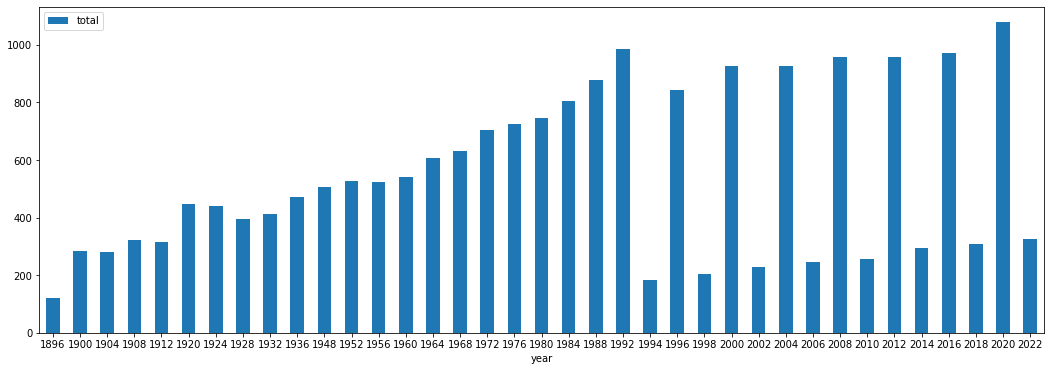

In [ ]:
plt.rcParams["figure.figsize"] = (18,6)
year_medal = medal[['year', 'total']].groupby('year').sum().plot.bar(rot=0)

In [ ]:
# описательная статистика

medal.describe()

,edition_id,year,gold,silver,bronze,total
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000
mean,31.840922,1980.616076,3.747049,3.730748,3.984261,11.462057
std,18.373576,32.052867,7.592407,6.443927,6.197969,19.522595
min,1.000000,1896.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,1960.000000,0.000000,1.000000,1.000000,2.000000
50%,25.000000,1988.000000,1.000000,2.000000,2.000000,5.000000
75%,53.000000,2008.000000,4.000000,4.000000,5.000000,13.000000
max,62.000000,2022.000000,83.000000,85.000000,83.000000,248.000000


### Таблица Olympics_Country

In [ ]:
# датасет со странами 

country = pd.read_csv('Olympics_Country.csv', na_values=['na'])
country.head()

,country_noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [ ]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country_noc  234 non-null    object
 1   country      234 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


### Таблица Olympics_Games

In [ ]:
# датасет с информацией об играх

games = pd.read_csv('Olympics_Games.csv', na_values=['na'])
games.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,isHeld,competition_start_date,competition_end_date
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,1896-04-06,1896-04-15,NaN,1896-04-06,1896-04-13
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,NaN,1900-05-14,1900-10-28
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,1904-05-14,NaN,NaN,1904-07-01,1904-11-23
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,1908-07-13,NaN,NaN,1908-04-27,1908-10-31
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,1912-07-06,1912-07-27,NaN,1912-05-05,1912-07-27


In [ ]:
# пропуски есть

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edition                 62 non-null     object
 1   edition_id              62 non-null     int64 
 2   edition_url             62 non-null     object
 3   year                    62 non-null     int64 
 4   city                    62 non-null     object
 5   country_flag_url        62 non-null     object
 6   country_noc             62 non-null     object
 7   start_date              52 non-null     object
 8   end_date                50 non-null     object
 9   isHeld                  5 non-null      object
 10  competition_start_date  52 non-null     object
 11  competition_end_date    52 non-null     object
dtypes: int64(2), object(10)
memory usage: 5.9+ KB


In [ ]:
# описательная статистиска

games.describe()

,edition_id,year
count,62.000000,62.000000
mean,38.983871,1968.935484
std,47.035212,37.111649
min,1.000000,1896.000000
25%,17.250000,1940.000000
50%,34.500000,1970.000000
75%,50.750000,1999.500000
max,372.000000,2032.000000


In [ ]:
# сортирую по годам - в датасете есть данные о месте проведения будущих игр в 2024, 2026, 2028, 2032

games.sort_values(by='year', ascending=False)


,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,isHeld,competition_start_date,competition_end_date
34,2032 Summer Olympics,372,/editions/372,2032,Brisbane,/images/flags/AUS.png,AUS,NaN,NaN,NaN,NaN,NaN
33,2028 Summer Olympics,64,/editions/64,2028,Los Angeles,/images/flags/USA.png,USA,NaN,NaN,NaN,NaN,NaN
61,2026 Winter Olympics,72,/editions/72,2026,Milano-Cortina d'Ampezzo,/images/flags/ITA.png,ITA,NaN,NaN,NaN,NaN,NaN
32,2024 Summer Olympics,63,/editions/63,2024,Paris,/images/flags/FRA.png,FRA,NaN,NaN,NaN,NaN,NaN
60,2022 Winter Olympics,62,/editions/62,2022,Beijing,/images/flags/CHN.png,CHN,2022-02-04,2022-02-20,NaN,2022-02-02,2022-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,1912-07-06,1912-07-27,NaN,1912-05-05,1912-07-27
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,1908-07-13,NaN,NaN,1908-04-27,1908-10-31
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,1904-05-14,NaN,NaN,1904-07-01,1904-11-23
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,NaN,1900-05-14,1900-10-28


In [ ]:
# данные по столбцу isHeld не заполнены - так как только 5 игр не проводились:

games[games['isHeld'].isin(['Not held due to war'])]

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,isHeld,competition_start_date,competition_end_date
5,1916 Summer Olympics,50,/editions/50,1916,Berlin,/images/flags/GER.png,GER,NaN,NaN,Not held due to war,NaN,NaN
11,1940 Summer Olympics,51,/editions/51,1940,Helsinki,/images/flags/FIN.png,FIN,NaN,NaN,Not held due to war,NaN,NaN
12,1944 Summer Olympics,52,/editions/52,1944,London,/images/flags/GBR.png,GBR,NaN,NaN,Not held due to war,NaN,NaN
39,1940 Winter Olympics,55,/editions/55,1940,Garmisch-Partenkirchen,/images/flags/GER.png,GER,NaN,NaN,Not held due to war,NaN,NaN
40,1944 Winter Olympics,56,/editions/56,1944,Cortina d'Ampezzo,/images/flags/ITA.png,ITA,NaN,NaN,Not held due to war,NaN,NaN


In [ ]:
# добавляем в таблицу полное название страны проведение игр из таблицы countries:

games = games.merge(country, on = 'country_noc', how='left')
games.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,isHeld,competition_start_date,competition_end_date,country
0,1896 Summer Olympics,1,/editions/1,1896,Athina,/images/flags/GRE.png,GRE,1896-04-06,1896-04-15,NaN,1896-04-06,1896-04-13,Greece
1,1900 Summer Olympics,2,/editions/2,1900,Paris,/images/flags/FRA.png,FRA,NaN,NaN,NaN,1900-05-14,1900-10-28,France
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,/images/flags/USA.png,USA,1904-05-14,NaN,NaN,1904-07-01,1904-11-23,United States
3,1908 Summer Olympics,5,/editions/5,1908,London,/images/flags/GBR.png,GBR,1908-07-13,NaN,NaN,1908-04-27,1908-10-31,Great Britain
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,/images/flags/SWE.png,SWE,1912-07-06,1912-07-27,NaN,1912-05-05,1912-07-27,Sweden


In [ ]:
games.columns

Index(['edition', 'edition_id', 'edition_url', 'year', 'city',
       'country_flag_url', 'country_noc', 'start_date', 'end_date', 'isHeld',
       'competition_start_date', 'competition_end_date', 'country'],
      dtype='object')

In [ ]:
# оставлем необходимую для анализа информацию

games = games[['edition_id', 'year', 'country', 'city']]
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   edition_id  62 non-null     int64 
 1   year        62 non-null     int64 
 2   country     62 non-null     object
 3   city        62 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


### Объединение таблиц

In [ ]:
# объединение трех таблиц для анализа:

bio_res = results_event.merge(bio, on = 'athlete_id', how='left').merge(games, on = 'edition_id', how='left')
bio_res.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,...,season,name,sex,height,weight_new,athlete_country,birth_year,year,country,city
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,...,Summer,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889,1908.0,Great Britain,London
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,...,Summer,Henry Murray,Male,NaN,NaN,Australasia,1886,1908.0,Great Britain,London
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,...,Summer,Harvey Sutton,Male,NaN,NaN,Australasia,1882,1908.0,Great Britain,London
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,...,Summer,Guy Haskins,Male,NaN,NaN,Australasia,1883,1908.0,Great Britain,London
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,...,Summer,Joseph Lynch,Male,NaN,NaN,Australasia,1878,1908.0,Great Britain,London


In [ ]:
bio_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314907 entries, 0 to 314906
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          314907 non-null  object 
 1   edition_id       314907 non-null  int64  
 2   country_noc      314907 non-null  object 
 3   sport            314907 non-null  object 
 4   event            314907 non-null  object 
 5   result_id        314907 non-null  int64  
 6   athlete          314907 non-null  object 
 7   athlete_id       314907 non-null  int64  
 8   pos              314907 non-null  object 
 9   medal            44571 non-null   object 
 10  isTeamSport      314907 non-null  bool   
 11  season           314907 non-null  object 
 12  name             314907 non-null  object 
 13  sex              314907 non-null  object 
 14  height           228041 non-null  float64
 15  weight_new       227983 non-null  float64
 16  athlete_country  314907 non-null  obje

In [ ]:
bio_res.columns

Index(['edition', 'edition_id', 'country_noc', 'sport', 'event', 'result_id',
       'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport', 'season',
       'name', 'sex', 'height', 'weight_new', 'athlete_country', 'birth_year',
       'year', 'country', 'city'],
      dtype='object')

In [ ]:
# оставляем только необходимые для анализа столбцы

bio_results = bio_res[['edition', 'season', 'country', 'city', 'year','sport', 'event', 'isTeamSport', 'name', 'sex', 'height',
       'weight_new', 'athlete_country', 'birth_year', 'pos', 'medal']]

In [ ]:
bio_results.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal
0,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"100 metres, Men",False,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889,DNS,NaN
1,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"400 metres, Men",False,Henry Murray,Male,NaN,NaN,Australasia,1886,DNS,NaN
2,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Harvey Sutton,Male,NaN,NaN,Australasia,1882,3 h8 r1/2,NaN
3,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Guy Haskins,Male,NaN,NaN,Australasia,1883,DNS,NaN
4,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Joseph Lynch,Male,NaN,NaN,Australasia,1878,DNS,NaN


In [ ]:
bio_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314907 entries, 0 to 314906
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          314907 non-null  object 
 1   season           314907 non-null  object 
 2   country          314584 non-null  object 
 3   city             314584 non-null  object 
 4   year             314584 non-null  float64
 5   sport            314907 non-null  object 
 6   event            314907 non-null  object 
 7   isTeamSport      314907 non-null  bool   
 8   name             314907 non-null  object 
 9   sex              314907 non-null  object 
 10  height           228041 non-null  float64
 11  weight_new       227983 non-null  float64
 12  athlete_country  314907 non-null  object 
 13  birth_year       308866 non-null  Int64  
 14  pos              314907 non-null  object 
 15  medal            44571 non-null   object 
dtypes: Int64(1), bool(1), float64(3), obje

In [ ]:
# сохраняем предобработанные результаты в файл для более быстрого подключения при длительном перерыве:

bio_results.to_csv('bio_results.csv')

In [ ]:
df = pd.read_csv('bio_results.csv', index_col=[0])
df.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal
0,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"100 metres, Men",False,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889.0,DNS,NaN
1,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"400 metres, Men",False,Henry Murray,Male,NaN,NaN,Australasia,1886.0,DNS,NaN
2,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Harvey Sutton,Male,NaN,NaN,Australasia,1882.0,3 h8 r1/2,NaN
3,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Guy Haskins,Male,NaN,NaN,Australasia,1883.0,DNS,NaN
4,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Joseph Lynch,Male,NaN,NaN,Australasia,1878.0,DNS,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314884 entries, 0 to 314883
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          314884 non-null  object 
 1   season           314884 non-null  object 
 2   country          314584 non-null  object 
 3   city             314584 non-null  object 
 4   year             314584 non-null  float64
 5   sport            314884 non-null  object 
 6   event            314884 non-null  object 
 7   isTeamSport      314884 non-null  bool   
 8   name             314884 non-null  object 
 9   sex              314884 non-null  object 
 10  height           228041 non-null  float64
 11  weight_new       227983 non-null  float64
 12  athlete_country  314884 non-null  object 
 13  birth_year       308859 non-null  float64
 14  pos              314884 non-null  object 
 15  medal            44571 non-null   object 
dtypes: bool(1), float64(4), object(11)
mem

In [ ]:
# добавляем новый столбец с возрастом спортсмена (как разницу между годом его рождения и годом проведения Олимпиады)

df['age'] = df['year'] - df['birth_year']
df.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age
0,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"100 metres, Men",False,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889.0,DNS,NaN,19.0
1,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"400 metres, Men",False,Henry Murray,Male,NaN,NaN,Australasia,1886.0,DNS,NaN,22.0
2,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Harvey Sutton,Male,NaN,NaN,Australasia,1882.0,3 h8 r1/2,NaN,26.0
3,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Guy Haskins,Male,NaN,NaN,Australasia,1883.0,DNS,NaN,25.0
4,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"800 metres, Men",False,Joseph Lynch,Male,NaN,NaN,Australasia,1878.0,DNS,NaN,30.0


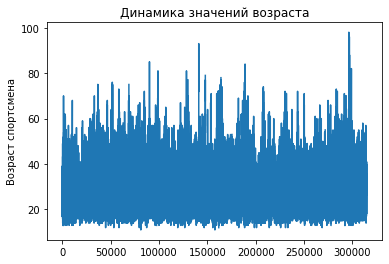

In [ ]:
# есть визуально выбивающиеся значения

plt.plot(df['age'])
plt.title('Динамика значений возраста')
plt.ylabel('Возраст спортсмена')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


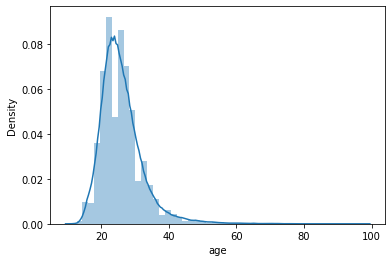

In [ ]:
# очень длинный хвост

sns_plot = sns.distplot(df['age'])
fig = sns_plot.get_figure()

In [ ]:
# откидываем 1% наибольших и 1% наименьших значений 

age_low = df['age'].quantile(0.01)
age_hi  = df['age'].quantile(0.99)

h_low = df['height'].quantile(0.01)
h_hi  = df['height'].quantile(0.99)

w_low = df['weight_new'].quantile(0.01)
w_hi  = df['weight_new'].quantile(0.99)

df_filtered = df[(df['age'] < age_hi) & (df['age'] > age_low) 
                & (df['height'] < h_hi) & (df['height'] > h_low) 
                & (df['weight_new'] < w_hi) & (df['weight_new'] > w_low)]

df_filtered.describe()

,year,height,weight_new,birth_year,age
count,214881.000000,214881.000000,214881.000000,214881.000000,214881.000000
mean,1990.926941,175.470102,70.435981,1965.171728,25.755213
std,21.608210,9.474023,12.414014,21.540198,5.033542
min,1896.000000,152.000000,44.000000,1853.000000,17.000000
25%,1976.000000,168.000000,61.000000,1951.000000,22.000000
50%,1996.000000,175.000000,70.000000,1969.000000,25.000000
75%,2008.000000,182.000000,79.000000,1982.000000,29.000000
max,2022.000000,199.000000,112.000000,2004.000000,47.000000


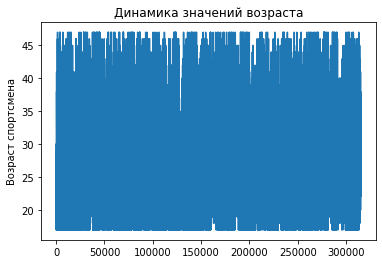

In [ ]:
# проверяем визуально - динамики равномерны

plt.plot(df_filtered['age'])
plt.title('Динамика значений возраста')
plt.ylabel('Возраст спортсмена')
plt.show()

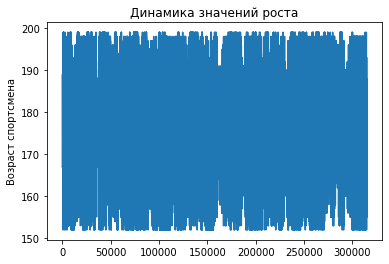

In [ ]:
# проверяем визуально - динамики равномерны

plt.plot(df_filtered['height'])
plt.title('Динамика значений роста')
plt.ylabel('Возраст спортсмена')
plt.show()

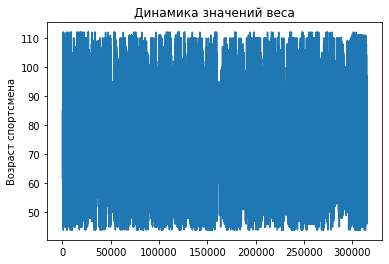

In [ ]:
# проверяем визуально - динамики равномерны

plt.plot(df_filtered['weight_new'])
plt.title('Динамика значений веса')
plt.ylabel('Возраст спортсмена')
plt.show()

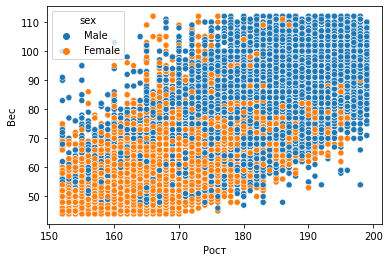

In [ ]:
# распределение веса и роста (м и ж) более равномерно

df3 = df_filtered[(df_filtered.weight_new != 0.0) & (df_filtered.height != 0.0)]
sns.scatterplot(x=df3.height, y=df3.weight_new, hue='sex', data=df3)
plt.xlabel("Рост")
plt.ylabel("Вес");

In [ ]:
# ушли пустые значения

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214881 entries, 9 to 314905
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          214881 non-null  object 
 1   season           214881 non-null  object 
 2   country          214881 non-null  object 
 3   city             214881 non-null  object 
 4   year             214881 non-null  float64
 5   sport            214881 non-null  object 
 6   event            214881 non-null  object 
 7   isTeamSport      214881 non-null  bool   
 8   name             214881 non-null  object 
 9   sex              214881 non-null  object 
 10  height           214881 non-null  float64
 11  weight_new       214881 non-null  float64
 12  athlete_country  214881 non-null  object 
 13  birth_year       214881 non-null  float64
 14  pos              214881 non-null  object 
 15  medal            31224 non-null   object 
 16  age              214881 non-null  floa

In [ ]:
# убрав выбросы мы избавились и от пропусков - пропуски в медалях нормальны, так как не все результаты были призовыми

df_filtered.isna().sum()

edition                 0
season                  0
country                 0
city                    0
year                    0
sport                   0
event                   0
isTeamSport             0
name                    0
sex                     0
height                  0
weight_new              0
athlete_country         0
birth_year              0
pos                     0
medal              183657
age                     0
dtype: int64

In [ ]:
# сохраняем предобработанные результаты в файл для более быстрого подключения при длительном перерыве:

df_filtered.to_csv('df_filtered.csv')

# Анализ данных и построение модели

---



### Анализ распределения спортсменов по полу и возрасту

In [ ]:
olymp = pd.read_csv('df_filtered.csv', index_col=[0])
olymp.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age
9,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"1,500 metres, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,DNS,NaN,30.0
10,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"5 miles, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,3 h1 r1/2,NaN,30.0
15,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"Marathon, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,DNF,NaN,30.0
20,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"3,500 metres Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879.0,3,Bronze,29.0
22,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"10 miles Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879.0,DNS r2/2,NaN,29.0


In [ ]:
print('Полностью дублированных строк:')
print(olymp.duplicated().sum())

Полностью дублированных строк:
43


In [ ]:
# избавимся от дубликатов

olymp.drop_duplicates(inplace=True)

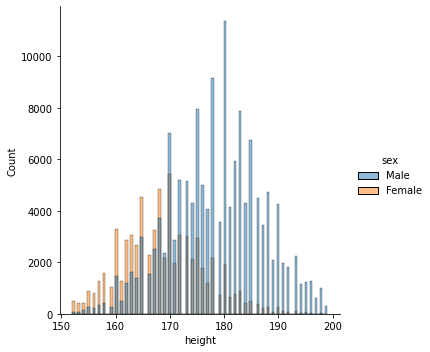

In [ ]:
# распределение роста спортсменов М и Ж = мужчины ожидаемо выше

sns.displot(x='height',
            hue='sex',
            data=olymp)

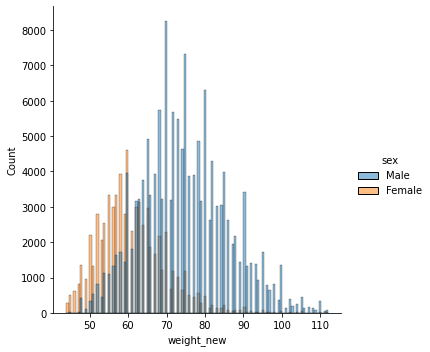

In [ ]:
# распределение веса спортсменов М и Ж = вес мужчин ожидаемо больше

sns.displot(x='weight_new',
            hue='sex',
            data=olymp);

In [ ]:
olymp['medal'].value_counts()

Bronze    10507
Gold      10507
Silver    10209
Name: medal, dtype: int64

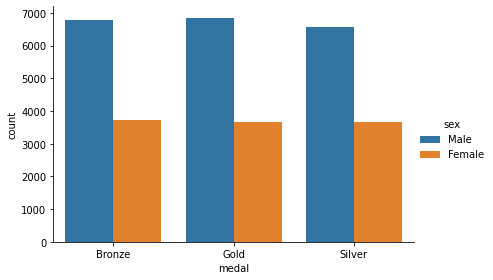

In [ ]:
# распределение медалей М и Ж

sns.catplot(x="medal", hue="sex",
                data=olymp, kind="count",
                height=4, aspect=1.5);

### Какой вид спорта самый многочисленный

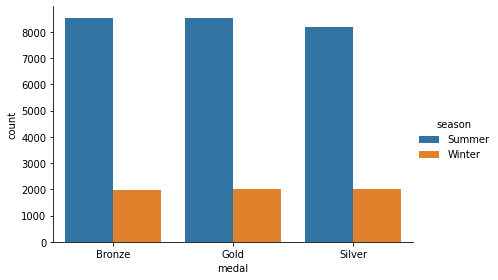

In [ ]:
# распределение медалей по сезону

sns.catplot(x="medal", hue="season",
                data=olymp, kind="count",
                height=4, aspect=1.5);

In [ ]:
# кол-во спортсменов по виду спорта (топ 10) - атлетика - самый древний вид

sport_country = olymp[['sport','name']]
sport_country.groupby('sport').count().sort_values('name', ascending=False).head(10)

,name
sport,
Athletics,35059
Swimming,17649
Artistic Gymnastics,15441
Cross Country Skiing,8853
Rowing,7697
Alpine Skiing,7536
Shooting,7143
Fencing,7024
Biathlon,5704


In [ ]:
summer_olympic = olymp[olymp.season=='Summer']
summer_sports = len(summer_olympic[['sport']].drop_duplicates())
summer_events = len(summer_olympic[['event']].drop_duplicates())
print(f'Летние виды спорта: {summer_sports}, подвиды: {summer_events}')

Летние виды спорта: 63, подвиды: 502


In [ ]:
winter_olympic = olymp[olymp.season=='Winter']
winter_sports = len(winter_olympic[['sport']].drop_duplicates())
winter_events = len(winter_olympic[['event']].drop_duplicates())
print(f'Зимние виды спорта: {winter_sports}, подвиды: {winter_events}')

Зимние виды спорта: 19, подвиды: 122


### Анализ биографических факторов, которые повышают шансы на получение медали

In [ ]:
# средние значения у медалиста роста\веса\возраста

medals = olymp[['height','weight_new','age','medal']]
medals.groupby(['medal']).mean()


,height,weight_new,age
medal,,,
Bronze,176.869135,72.389740,26.111735
Gold,177.555344,73.204625,25.997430
Silver,177.104712,72.746204,26.120286


In [ ]:
# если сравнить со средним значением по всей таблице, то среднее значение тех же параметров ниже

no_medals = olymp[olymp['medal'].isnull()]
no_medals = no_medals[['height','weight_new','age','medal']]
no_medals.describe()

,height,weight_new,age
count,183615.000000,183615.000000,183615.000000
mean,175.179343,70.037094,25.700760
std,9.408799,12.295177,5.076049
min,152.000000,44.000000,17.000000
25%,168.000000,61.000000,22.000000
50%,175.000000,69.000000,25.000000
75%,182.000000,78.000000,29.000000
max,199.000000,112.000000,47.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Распределение золотых медалей по возрасту')

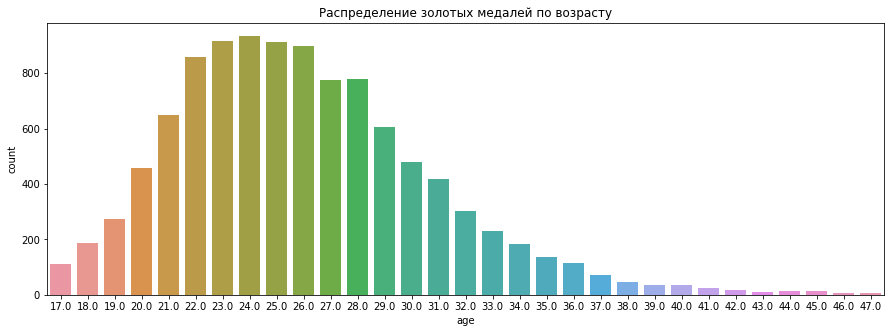

In [ ]:
# шансы завоевать золотую медаль после 40 очень малы

gold_m = olymp[(olymp.medal == 'Gold')]
gold_m = gold_m[np.isfinite(gold_m['age'])]
plt.figure(figsize=(15, 5))
plt.tight_layout()
sns.countplot(gold_m['age'])
plt.title('Распределение золотых медалей по возрасту')

In [ ]:
gold_m['name'][gold_m['age'] > 40].count()

94

In [ ]:
df1 = gold_m[(gold_m.age >= 40)][['name','height','age','sport']]
df1['sport'].value_counts()

Equestrian Dressage     22
Sailing                 18
Equestrian Eventing     15
Equestrian Jumping      14
Shooting                13
Fencing                  8
Curling                  7
Rowing                   4
Bobsleigh                4
Biathlon                 3
Artistic Gymnastics      3
Canoe Sprint             2
Archery                  2
Cross Country Skiing     2
Athletics                2
Ice Hockey               2
Wrestling                2
Water Polo               1
Volleyball               1
Cycling Track            1
Cycling Road             1
Basketball               1
Snowboarding             1
Name: sport, dtype: int64

In [ ]:
# создаем женский датасет по виду спорта

olymp_women = olymp[(olymp.sex=='Female')][['sex','sport']]
olymp_women = olymp_women.groupby('sport').count().sort_values('sex', ascending=False).reset_index()
olymp_women.head()

,sport,sex
0,Athletics,11775
1,Swimming,7331
2,Artistic Gymnastics,4437
3,Cross Country Skiing,3649
4,Alpine Skiing,3090


In [ ]:
# создаем мужской датасет по виду спорта

o_men = olymp[(olymp.sex=='Male')][['sex','sport']]
o_men = o_men.groupby('sport').count().sort_values('sex', ascending=False).reset_index()
o_men.head()

,sport,sex
0,Athletics,23284
1,Artistic Gymnastics,11004
2,Swimming,10318
3,Rowing,5523
4,Shooting,5429


In [ ]:
# создаем женский датасет (летние игры)

olymp_women_s = olymp[(olymp.sex=='Female') & (olymp.season=='Summer')][['sex','year']]
olymp_women_s = olymp_women_s.groupby('year').count().reset_index()
olymp_women_s.head()

,year,sex
0,1920.0,1
1,1924.0,5
2,1928.0,63
3,1932.0,64
4,1936.0,98


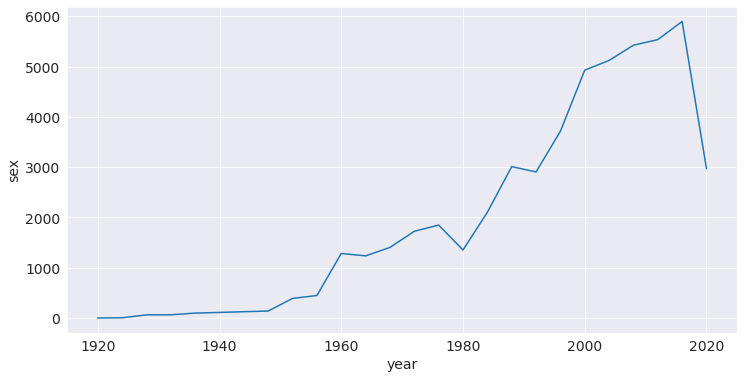

In [ ]:
# как менялось количество женщин, принимавших участие в летних олимпийских играх

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

plt.figure(figsize=(12,6))

sns.lineplot(
    data=olymp_women_s, x="year", y="sex",  err_style="bars", ci=68)

In [ ]:
# создаем мужской датасет (летние игры)

olymp_men_s = olymp[(olymp.sex=='Male') & (olymp.season=='Summer')][['sex','year']]
olymp_men_s = olymp_men_s.groupby('year').count().reset_index()
olymp_men_s.head()

,year,sex
0,1896.0,61
1,1900.0,129
2,1904.0,236
3,1908.0,555
4,1912.0,810


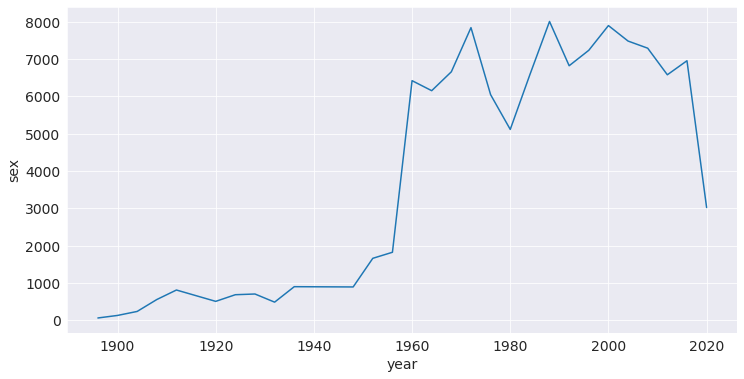

In [ ]:
# как менялось количество мужчин, принимавших участие в летних олимпийских играх

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)

plt.figure(figsize=(12,6))

sns.lineplot(
    data=olymp_men_s, x="year", y="sex",  err_style="bars", ci=68)

In [ ]:

ages_w = olymp[(olymp.sex=='Female')][['sex','age', 'year']]
ages_w = ages_w.groupby('year').mean().sort_values('year').reset_index()
ages_w.head()

,year,age
0,1920.0,36.000000
1,1924.0,25.500000
2,1928.0,21.753846
3,1932.0,21.388060
4,1936.0,23.873786


Средний возраст Ж:  24.88955429346413


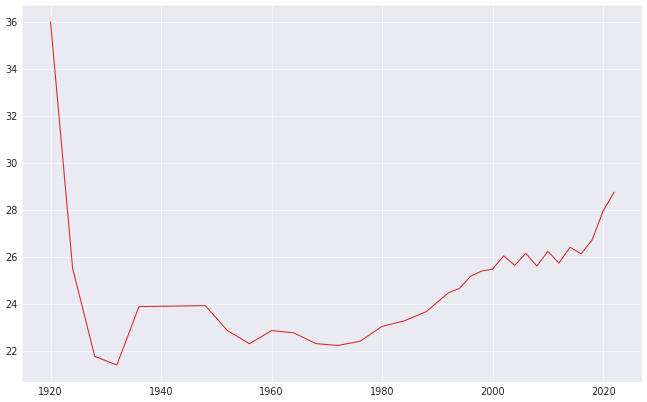

In [ ]:
# визуализируем средний возраст женщин по годам

plt.figure(figsize=(16,10), dpi= 50)
plt.plot('year', 'age', data=ages_w, color='tab:red')
print('Средний возраст Ж: ', ages_w['age'].mean())

In [ ]:
ages_m = olymp[(olymp.sex=='Male')][['sex','age', 'year']]
ages_m = ages_m.groupby('year').mean().sort_values('year').reset_index()
ages_m.head()

,year,age
0,1896.0,24.327869
1,1900.0,23.992248
2,1904.0,24.385593
3,1908.0,24.378378
4,1912.0,24.502469


Средний возраст М:  26.0718803491867


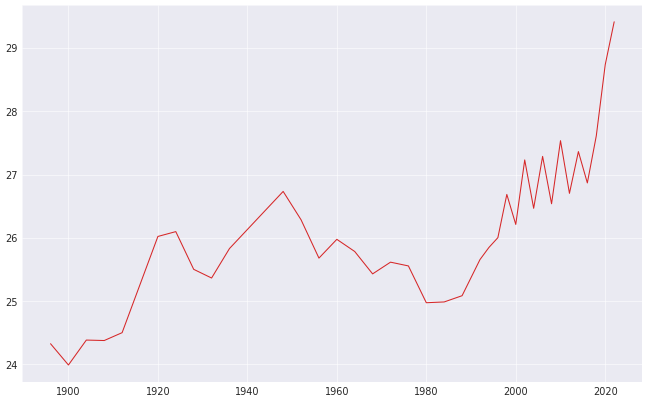

In [ ]:
# визуализируем средний возраст мужчин по годам

plt.figure(figsize=(16,10), dpi= 50)
plt.plot('year', 'age', data=ages_m, color='tab:red')
print('Средний возраст М: ', ages_m['age'].mean())

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


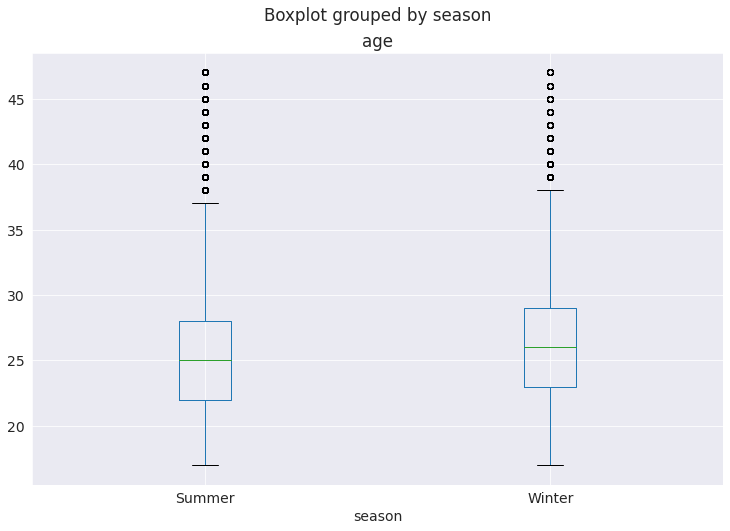

In [ ]:
# медиана возраста участников зимних игр выше, чем летних

data = olymp
data.boxplot('age', by='season', figsize=(12, 8));  

### Построение модели

In [ ]:
# создадим новый столбец, значения nan заполним 0

olymp['new_medal'] = olymp['medal'].fillna(0)
olymp.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age,new_medal
9,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"1,500 metres, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,DNS,NaN,30.0,0
10,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"5 miles, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,3 h1 r1/2,NaN,30.0,0
15,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"Marathon, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,DNF,NaN,30.0,0
20,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"3,500 metres Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879.0,3,Bronze,29.0,Bronze
22,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"10 miles Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879.0,DNS r2/2,NaN,29.0,0


In [ ]:
# если результат был призовой заполним 1

olymp.new_medal = olymp.new_medal.replace('Gold',1).replace('Silver',1).replace('Bronze',1)
olymp.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age,new_medal
9,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"1,500 metres, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,DNS,NaN,30.0,0
10,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"5 miles, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,3 h1 r1/2,NaN,30.0,0
15,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"Marathon, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878.0,DNF,NaN,30.0,0
20,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"3,500 metres Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879.0,3,Bronze,29.0,1
22,1908 Summer Olympics,Summer,Great Britain,London,1908.0,Athletics,"10 miles Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879.0,DNS r2/2,NaN,29.0,0


In [ ]:
# проверяем новый столбец

olymp.new_medal.value_counts()

0    183615
1     31223
Name: new_medal, dtype: int64

In [ ]:
# построим модель обучения на спортсменах-мужчинах

olymp_men = olymp[olymp['sex'].isin(['Male'])]
olymp_men = olymp_men[['height', 'weight_new', 'age', 'new_medal']]
olymp_men.head()

,height,weight_new,age,new_medal
9,167.0,62.0,30.0,0
10,167.0,62.0,30.0,0
15,167.0,62.0,30.0,0
20,184.0,76.0,29.0,1
22,184.0,76.0,29.0,0


In [ ]:
X, y = olymp_men[['height', 'weight_new', 'age']], olymp_men['new_medal']

In [ ]:
# Функции для разделения данных на данные для обучения и тестирования

from sklearn.model_selection import train_test_split

In [ ]:
# Разделяем данные на данные для обучения и тестирования

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Импортируем модуль логистический регрессии

from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# прогноз тестовой выборки

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# сравнение прогноза с фактом

test_men = X_test.copy()

test_men['y_pred'] = y_pred
test_men['y_test'] = y_test
test_men.head(20)

,height,weight_new,age,y_pred,y_test
247307,187.0,90.0,26.0,0,0
110765,174.0,76.0,25.0,0,1
277565,178.0,80.0,37.0,0,0
242780,181.0,78.0,21.0,0,0
212034,181.0,78.0,29.0,0,0
289460,189.0,82.0,30.0,0,0
18598,155.0,48.0,29.0,0,0
28675,173.0,67.0,25.0,0,0
135296,163.0,63.0,34.0,0,0
249191,183.0,80.0,27.0,0,0


In [ ]:
# Оцениваем качество

from sklearn.metrics import accuracy_score

In [ ]:
# Оцениваем качество на выборке для обучения

accuracy_score(y_train, model.predict(X_train))

0.8621354255500597

In [ ]:
# Оцениваем качество на выборке для тестирования

accuracy_score(y_test, model.predict(X_test))

0.8621912948560513

In [ ]:
# качество модели на выборке для обучения и на выборке для тестирования составляет 0.8621, что значит, что модель обучилась достаточно хорошо,
# таким образом модель с точностью 86,21% делает верный прогноз, что является неплохим показателем.

In [ ]:
# Результат показывает, что у нас 25276 верных прогнозов и 4040 ошибочных.

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[25276     0]
 [ 4040     0]]


# Выводы: 

1.   Среди участников олимпиады большинство мужчин, но количество женщин растет с каждым годом.

2.   Наибольшее количество женщин - в атлетике, плавании и художественной гимнастике.

3.   Наибольшее количество спортсменов в атлетике объясняет большим количеством видов, а также тем фактом, что данный вид спорта присутствует и на летних и на зимних олимпийских играх.

4.   Средний возраст победы на олимпийских играх составляет 26 лет.

5.   В среднем показатели роста, веса и возраста у олимпийских призеров выше, чем у участников олимпиад, которые не получили медалей.

6.   С каждым годом средний возраст спортсмена-участника олимпиады растет.

7.   Созданная прогнозная модель вероятности получения медали на олимпиаде, основываясь на росте, весе и возрасте спортсменапредсказывает с точностью 86,21%.




